# 导入原始数据集

---

In [1]:
import pandas as pd

file = pd.read_csv('Operate_ID_and_Boarding_Data.csv')
df_data = pd.DataFrame(file)

In [2]:
df_data

,OPERATE_ID,GET_ON_LONGITUDE,GET_ON_LATITUDE
0,20170204000033716076,113.220777,23.147829
1,20170204000033717917,113.376185,22.961079
2,20170204000033717918,113.326963,23.135939
3,20170204000033717984,113.322663,23.117256
4,20170204000033716743,113.247786,23.185061
...,...,...,...
11175133,20170329000044254931,113.290320,23.391121
11175134,20170329000044254935,113.416696,23.132432
11175135,20170329000044256698,113.335566,23.151995
11175136,20170329000044256703,113.296362,23.152669


# 将GPS坐标转换为火星坐标

---

In [3]:
import math
x_pi = 3.14159265358979324 * 3000.0 / 180.0
pi = 3.1415926535897932384626  # π
a = 6378245.0  # 长半轴
ee = 0.00669342162296594323  # 偏心率平方

def wgs84_to_gcj02(lng, lat):
    """
    WGS84转GCJ02(火星坐标系)
    :param lng:WGS84坐标系的经度
    :param lat:WGS84坐标系的纬度
    :return:
    """
    if out_of_china(lng, lat):  # 判断是否在国内
        return [lng, lat]
    dlat = _transformlat(lng - 105.0, lat - 35.0)
    dlng = _transformlng(lng - 105.0, lat - 35.0)
    radlat = lat / 180.0 * pi
    magic = math.sin(radlat)
    magic = 1 - ee * magic * magic
    sqrtmagic = math.sqrt(magic)
    dlat = (dlat * 180.0) / ((a * (1 - ee)) / (magic * sqrtmagic) * pi)
    dlng = (dlng * 180.0) / (a / sqrtmagic * math.cos(radlat) * pi)
    mglat = lat + dlat
    mglng = lng + dlng
    return [mglng, mglat]


def out_of_china(lng, lat):
    """
    判断是否在国内，不在国内不做偏移
    :param lng:
    :param lat:
    :return:
    """
    return not (lng > 73.66 and lng < 135.05 and lat > 3.86 and lat < 53.55)

def _transformlat(lng, lat):
    ret = -100.0 + 2.0 * lng + 3.0 * lat + 0.2 * lat * lat + \
          0.1 * lng * lat + 0.2 * math.sqrt(math.fabs(lng))
    ret += (20.0 * math.sin(6.0 * lng * pi) + 20.0 *
            math.sin(2.0 * lng * pi)) * 2.0 / 3.0
    ret += (20.0 * math.sin(lat * pi) + 40.0 *
            math.sin(lat / 3.0 * pi)) * 2.0 / 3.0
    ret += (160.0 * math.sin(lat / 12.0 * pi) + 320 *
            math.sin(lat * pi / 30.0)) * 2.0 / 3.0
    return ret


def _transformlng(lng, lat):
    ret = 300.0 + lng + 2.0 * lat + 0.1 * lng * lng + \
          0.1 * lng * lat + 0.1 * math.sqrt(math.fabs(lng))
    ret += (20.0 * math.sin(6.0 * lng * pi) + 20.0 *
            math.sin(2.0 * lng * pi)) * 2.0 / 3.0
    ret += (20.0 * math.sin(lng * pi) + 40.0 *
            math.sin(lng / 3.0 * pi)) * 2.0 / 3.0
    ret += (150.0 * math.sin(lng / 12.0 * pi) + 300.0 *
            math.sin(lng / 30.0 * pi)) * 2.0 / 3.0
    return ret

lng_lat = []

for i in range(len(df_data.index)):
    lng_lat.append(wgs84_to_gcj02(df_data.GET_ON_LONGITUDE[i], df_data.GET_ON_LATITUDE[i]))
    

In [4]:
lng = []
lat = []

for x in lng_lat:
    lng.append(x[0])
    lat.append(x[1])

In [5]:
df_data['GET_ON_LONGITUDE'] = lng
df_data['GET_ON_LATITUDE'] = lat

In [6]:
df_data

,OPERATE_ID,GET_ON_LONGITUDE,GET_ON_LATITUDE
0,20170204000033716076,113.226116,23.145171
1,20170204000033717917,113.381686,22.958499
2,20170204000033717918,113.332391,23.133354
3,20170204000033717984,113.328081,23.114655
4,20170204000033716743,113.253114,23.182402
...,...,...,...
11175133,20170329000044254931,113.295697,23.388549
11175134,20170329000044254935,113.422214,23.129934
11175135,20170329000044256698,113.341013,23.149433
11175136,20170329000044256703,113.301732,23.150036


In [7]:
# 导出已经进行坐标转换的数据集
# df_data.to_csv('_Operate_ID_and_Boarding_Data.csv')

# import pandas as pd
# file = pd.read_csv('_Operate_ID_and_Boarding_Data.csv')
# df_data = pd.DataFrame(file)
# dal df_data['Unnamed: 0']

# 数据预处理

---

### 提取出原始数据中完整一周（02.05~02.11）的数据

In [8]:
# 从运营ID中提取出每条数据的日期

DATE = []

for i in range(len(df_data.index)):
    DATE.append(df_data.OPERATE_ID[i][:8])
    
df_data['DATE'] = DATE
del df_data['OPERATE_ID']

In [18]:
df_data_week = df_data.copy(deep=True)

In [19]:
df_data_week

,GET_ON_LONGITUDE,GET_ON_LATITUDE
0,113.341709,23.170732
1,113.341869,23.170696
2,113.268586,23.131016
3,113.343694,23.123688
4,113.315816,23.085144
...,...,...
125121,113.336454,23.136773
125122,113.336055,23.143568
125123,113.234092,23.116359
125124,113.247558,23.125784


In [ ]:
# 剔除除（02.05~02.11）外的数据

or i in range(20170301, 20170332):
    df_data_week = df_data_week[-df_data_week.DATE.isin([str(i)])]
    
for i in range(20170201, 20170205):
    df_data_week = df_data_week[-df_data_week.DATE.isin([str(i)])]

for i in range(20170212, 20170229):
    df_data_week = df_data_week[-df_data_week.DATE.isin([str(i)])]

In [ ]:
set(df_data_week.DATE)

In [ ]:
# 对index重新排序

df_data_week = df_data_week.reset_index(drop=True)

In [ ]:
del del df_data['DATE']

In [ ]:
df_data_week

### 将数据点限制在广州市的区域范围内

In [11]:
# 导入广州市边界经纬度数据

with open('city_boundary.txt', 'r') as f:
    city_boundary = f.read()

In [12]:
city_boundary

'113.203717,23.121872;113.209714,23.121848;113.210547,23.12337;113.211605,23.128883;113.212463,23.136315;113.212671,23.141104;113.211432,23.141658;113.21171,23.143438;113.211691,23.143509;113.210986,23.143341;113.209957,23.143156;113.208934,23.143238;113.208934,23.144074;113.208214,23.144074;113.208202,23.144388;113.204973,23.143865;113.204962,23.144306;113.201419,23.144469;113.201082,23.146107;113.19884,23.146083;113.197168,23.146176;113.194428,23.146887;113.194484,23.145363;113.194182,23.145352;113.194182,23.146002;113.193578,23.145805;113.192777,23.144922;113.192196,23.144922;113.191511,23.145328;113.191267,23.144887;113.189641,23.144794;113.188549,23.145096;113.188305,23.145561;113.188407,23.146553;113.187939,23.146636;113.187724,23.147361;113.188781,23.148139;113.18834,23.148465;113.187515,23.149603;113.188021,23.151619;113.187746,23.152446;113.187443,23.152363;113.187168,23.152693;113.186748,23.152588;113.186423,23.15289;113.186283,23.153081;113.186246,23.153564;113.185883,23.153

In [13]:
city_boundary = city_boundary.split(';')

In [14]:
city_boundary

['113.203717,23.121872',
 '113.209714,23.121848',
 '113.210547,23.12337',
 '113.211605,23.128883',
 '113.212463,23.136315',
 '113.212671,23.141104',
 '113.211432,23.141658',
 '113.21171,23.143438',
 '113.211691,23.143509',
 '113.210986,23.143341',
 '113.209957,23.143156',
 '113.208934,23.143238',
 '113.208934,23.144074',
 '113.208214,23.144074',
 '113.208202,23.144388',
 '113.204973,23.143865',
 '113.204962,23.144306',
 '113.201419,23.144469',
 '113.201082,23.146107',
 '113.19884,23.146083',
 '113.197168,23.146176',
 '113.194428,23.146887',
 '113.194484,23.145363',
 '113.194182,23.145352',
 '113.194182,23.146002',
 '113.193578,23.145805',
 '113.192777,23.144922',
 '113.192196,23.144922',
 '113.191511,23.145328',
 '113.191267,23.144887',
 '113.189641,23.144794',
 '113.188549,23.145096',
 '113.188305,23.145561',
 '113.188407,23.146553',
 '113.187939,23.146636',
 '113.187724,23.147361',
 '113.188781,23.148139',
 '113.18834,23.148465',
 '113.187515,23.149603',
 '113.188021,23.151619',
 '11

In [15]:
city_boundary_lng = []
city_boundary_lat = []
for x in city_boundary:
    city_boundary_lng.append(float(x.split(',')[0]))
    city_boundary_lat.append(float(x.split(',')[1]))

In [20]:
import operator
import pandas as pd
# nvert:区域边界点的个数，vertx:区域边界点的经度，verty:区域边界点的维度，（testx,testy）：检测点坐标
def pnpoly(testx,testy,nvert=len(city_boundary),vertx=city_boundary_lng,verty=city_boundary_lat):
    c=0
    for i in range(0,nvert):
        if i==0:
            j=nvert-1
        else:
            j=i-1
        if operator.ne(operator.gt(verty[i],testy),operator.gt(verty[j],testy)) and operator.lt(testx,(vertx[j]-vertx[i]) * (testy-verty[i]) / (verty[j]-verty[i]) + vertx[i]):
            c=1-c  #点在区域内
   
    return c

PNPOLY=[]

for i in range(len(df_data_week.index)):
    PNPOLY.append(pnpoly(testx=df_data_week.GET_ON_LONGITUDE[i], testy=df_data_week.GET_ON_LATITUDE[i]))
    
df_data_week['PNPOLY'] = PNPOLY
# 剔除PNPOLY为0的行
df_data_week = df_data_week[-df_data_week.PNPOLY.isin([0])]
del df_data_week['PNPOLY']
df_data_week = df_data_week.reset_index(drop = True)

In [21]:
df_data_week

,GET_ON_LONGITUDE,GET_ON_LATITUDE
0,113.341709,23.170732
1,113.341869,23.170696
2,113.268586,23.131016
3,113.343694,23.123688
4,113.315816,23.085144
...,...,...
121806,113.336454,23.136773
121807,113.336055,23.143568
121808,113.234092,23.116359
121809,113.247558,23.125784


In [22]:
df_data_week.to_csv('data_week.csv')

---

---

In [1]:
# import pandas as pd

# file = pd.read_csv('data_week.csv')
# df_data_week = pd.DataFrame(file)
# del df_data_week['Unnamed: 0']
# df_data_week

# 载客热点问题求解

---

In [24]:
# 统计（02.05~02.11）内各上车经纬度点出现的次数，选取出现次数大于10的点作为载客热点

points = {}

for i in range(len(df_data_week.values)):
    points.setdefault(str(list(df_data_week.values[i])), 0)
    points[str(list(df_data_week.values[i]))] += 1

point = list(set(points.values()))

passenger_hot_spot = []

for x in point:
    if x > 10:
        passenger_hot_spot.extend([key for key, value in points.items() if value == x])
        
len(passenger_hot_spot)

28

In [27]:
get_on_longitude = []
get_on_latitude = []

for i in passenger_hot_spot:
    get_on_longitude.append(i.strip('['']').split(',')[0])
    get_on_latitude.append(i.strip('['']').split(',')[1])

In [28]:
import pandas as pd

passenger_hot_spot = pd.DataFrame(get_on_longitude, columns = ['GET_ON_LONGITUDE'])
passenger_hot_spot['GET_ON_LATITUDE'] = get_on_latitude

In [31]:
passenger_hot_spot.to_csv('passenger_hot_spot_week.csv')

# 需求区域问题求解

---

### KMeans

In [26]:
K_data_week = df_data_week.copy(deep=True)
list_K_data_week = list(K_data_week.values)

In [28]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=6).fit(list_K_data_week)

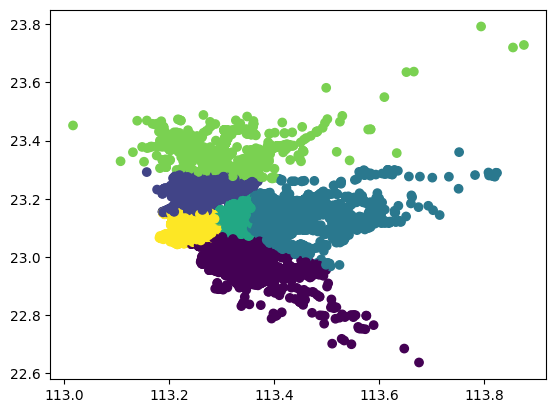

In [23]:
import matplotlib.pyplot as plt
import numpy as np

plt.scatter(np.array(list_K_data_week)[:, 0], np.array(list_K_data_week)[:, 1], c=kmeans.labels_)
plt.show()

In [30]:
K_data_week['LABEL'] = kmeans.labels_

In [31]:
CLUSTER_CENTER = []

for i in K_data_week.LABEL:
    CLUSTER_CENTER.append(kmeans.cluster_centers_[i])

In [32]:
K_data_week['CLUSTER_CENTER'] = CLUSTER_CENTER

In [33]:
# 根据经纬度计算各点与中心点的实际距离

from geopy.distance import geodesic

DISTANCE = []

for i in range(len(K_data_week.index)):
    DISTANCE.append(geodesic((K_data_week.CLUSTER_CENTER[i][1], K_data_week.CLUSTER_CENTER[i][0]), (K_data_week.GET_ON_LATITUDE[i], K_data_week.GET_ON_LONGITUDE[i])))

In [38]:
K_data_week['DISTANCE'] = [float(str(x).strip('km'))*1000 for x in DISTANCE]  # 转换为以'm'为单位

In [30]:
K_data_week

,GET_ON_LONGITUDE,GET_ON_LATITUDE,LABEL,CLUSTER_CENTER,DISTANCE
0,113.274789,23.164829,1,"[113.26430659654461, 23.186617002654625]",2640.918669
1,113.416283,23.073416,2,"[113.39188103363318, 23.12961164199432]",6706.686376
2,113.282339,23.127113,5,"[113.26306543390075, 23.11685798928059]",2277.572416
3,113.305442,23.387105,4,"[113.304818322253, 23.374250817620215]",1425.066828
4,113.341015,23.135343,3,"[113.32267230879458, 23.131527655023195]",1925.618175
...,...,...,...,...,...
1207087,113.224795,23.195710,1,"[113.26430659654461, 23.186617002654625]",4168.596784
1207088,113.302851,23.220788,1,"[113.26430659654461, 23.186617002654625]",5467.126796
1207089,113.269406,23.118386,5,"[113.26306543390075, 23.11685798928059]",671.150936
1207090,113.340037,23.126240,3,"[113.32267230879458, 23.131527655023195]",1872.523427


In [40]:
# 求各需求区域中各点离中心点最远的距离，将其作为需求区域的半径
# 根据需求区域中点的数量确定个需求区域的等级

center_radius = {}

for i in range(len(K_data_week.index)):
    center_radius.setdefault(str(list(K_data_week.CLUSTER_CENTER[i])).strip('['']'), K_data_week.DISTANCE[i])
    if K_data_week.DISTANCE[i] > center_radius[str(list(K_data_week.CLUSTER_CENTER[i])).strip('['']')]:
        center_radius[str(list(K_data_week.CLUSTER_CENTER[i])).strip('['']')] = K_data_week.DISTANCE[i]

In [54]:
str(list(K_data_week.CLUSTER_CENTER[0]))

'[113.3316650260466, 23.160334897411527]'

In [55]:
K_data_week_CLUSTER_CENTER = []
for i in range(len(K_data_week.index)):
    K_data_week_CLUSTER_CENTER.append(str(list(K_data_week.CLUSTER_CENTER[i])).strip('['']'))

In [56]:
K_data_week_CLUSTER_CENTER

['113.3316650260466, 23.160334897411527',
 '113.3316650260466, 23.160334897411527',
 '113.27771294243537, 23.12874246477332',
 '113.32632037679967, 23.119338359638466',
 '113.32632037679967, 23.119338359638466',
 '113.27771294243537, 23.12874246477332',
 '113.40342422593096, 23.12242609466284',
 '113.27771294243537, 23.12874246477332',
 '113.32632037679967, 23.119338359638466',
 '113.3073886667884, 22.997449104387776',
 '113.27475556957349, 23.214085149782292',
 '113.27771294243537, 23.12874246477332',
 '113.27471769818453, 23.09084128852986',
 '113.24243826330414, 23.115203855021377',
 '113.3316650260466, 23.160334897411527',
 '113.24243826330414, 23.115203855021377',
 '113.27471769818453, 23.09084128852986',
 '113.27771294243537, 23.12874246477332',
 '113.27475556957349, 23.214085149782292',
 '113.27771294243537, 23.12874246477332',
 '113.27771294243537, 23.12874246477332',
 '113.27771294243537, 23.12874246477332',
 '113.32632037679967, 23.119338359638466',
 '113.24243826330414, 23.1

In [57]:
level = {}

for x in K_data_week_CLUSTER_CENTER:
    level.setdefault(str(x).strip('[array([''])]'), 0)
    level[str(x).strip('[array([''])]')] += 1
    
level = sorted(level.items(), key=lambda item:item[1], reverse=True)

level = dict(level)

from pandas.core.frame import DataFrame

center_radius_level = DataFrame(list(center_radius.keys()), columns = ['CENTER'])

In [37]:
center_radius_level

,CENTER
0,"113.26430659654461, 23.186617002654625"
1,"113.39188103363318, 23.12961164199432"
2,"113.26306543390075, 23.11685798928059"
3,"113.304818322253, 23.374250817620215"
4,"113.32267230879458, 23.131527655023195"
5,"113.30927189921475, 23.020141068165135"


In [65]:
center_radius_level['RADIUS'] = list(center_radius.values())

In [70]:
i = 1
for x in list(level.keys()):
    center_radius_level.loc[center_radius_level['CENTER'] == x, 'LEVEL'] = i
    i+=1

In [40]:
center_radius_level

,CENTER,RADIUS,LEVEL
0,"113.26430659654461, 23.186617002654625",16006.391955,3.0
1,"113.39188103363318, 23.12961164199432",47611.255807,4.0
2,"113.26306543390075, 23.11685798928059",10137.205668,1.0
3,"113.304818322253, 23.374250817620215",70200.483218,6.0
4,"113.32267230879458, 23.131527655023195",9279.329879,2.0
5,"113.30927189921475, 23.020141068165135",56632.742114,5.0


In [72]:
center_radius_level.to_csv('center_radius_level_weeek.csv')

### MiniBatchKMeans

In [82]:
M_data_week = df_data_week.copy(deep=True)
list_M_data_week = list(M_data_week.values)

In [83]:
from sklearn.cluster import MiniBatchKMeans

minibatchkmeans = MiniBatchKMeans(n_clusters=6).fit(list_M_data_week)

D:\Program Files (x86)\Anaconda3-2021.05\lib\site-packages\sklearn\cluster\_kmeans.py:887: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=1
  warnings.warn(


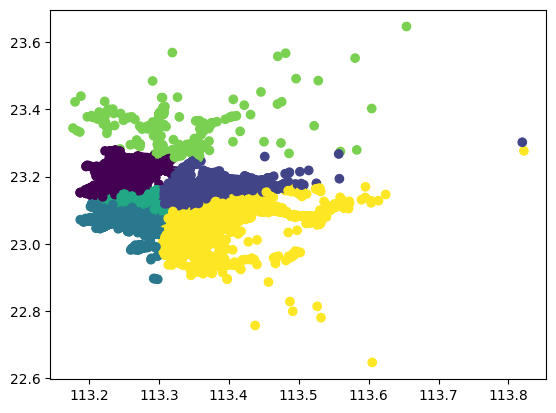

In [84]:
import matplotlib.pyplot as plt
import numpy as np

plt.scatter(np.array(list_M_data_week)[:, 0], np.array(list_M_data_week)[:, 1], c=minibatchkmeans.labels_)
plt.show()

### DBSCAN

In [84]:
D_data_week = df_data_week.copy(deep=True)
list_D_data_week = list(D_data_week.values)

In [2]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.011, min_samples=1000).fit(list_D_data_week[:100000])

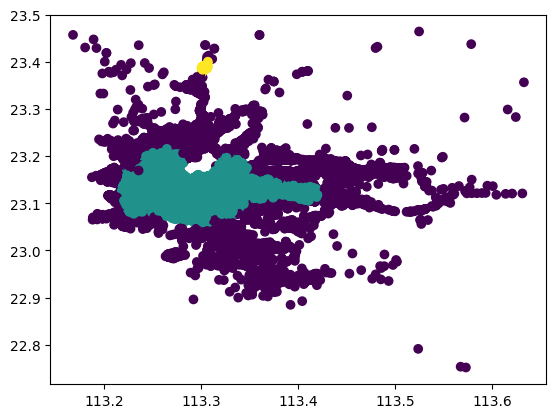

In [28]:
import matplotlib.pyplot as plt
import numpy as np

plt.scatter(np.array(list_D_data_week[:100000])[:, 0], np.array(list_D_data_week[:100000])[:, 1], c=dbscan.labels_)
plt.show()

In [29]:
set(dbscan.labels_)

{-1, 0, 1}

### OPTICS

In [ ]:
O_data_week = df_data_week.copy(deep=True)
list_O_data_week = list(O_data_week.values)

In [32]:
from sklearn.cluster import OPTICS

optics = OPTICS(min_samples=10000, max_eps=0.1, eps=0.1, cluster_method='dbscan').fit(list_O_data_week[:100000])

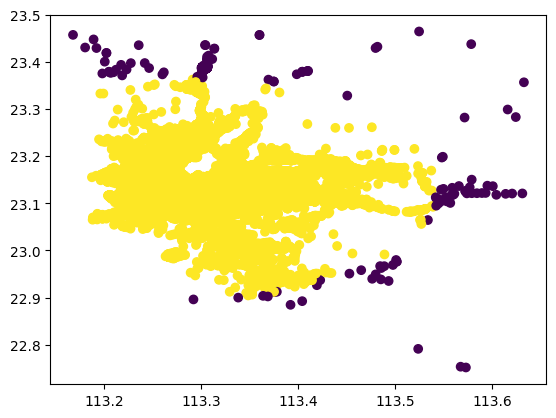

In [33]:
import matplotlib.pyplot as plt
import numpy as np

plt.scatter(np.array(list_O_data_week[:100000])[:, 0], np.array(list_O_data_week[:100000])[:, 1], c=optics.labels_)
plt.show()

### Birch

In [84]:
B_data_week = df_data_week.copy(deep=True)
list_B_data_week = list(B_data_week.values)

In [10]:
from sklearn.cluster import Birch

birch = Birch(threshold=0.01, n_clusters=6, branching_factor=100000).fit(list_B_data_week)

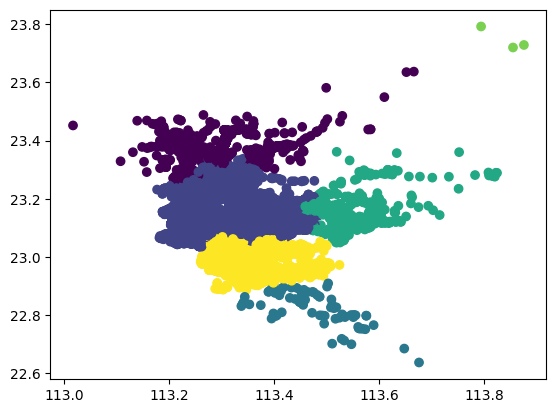

In [11]:
import matplotlib.pyplot as plt
import numpy as np

plt.scatter(np.array(list_B_data_week)[:, 0], np.array(list_B_data_week)[:, 1], c=birch.labels_)
plt.show()

In [14]:
birch.subcluster_centers_

array([[113.26595867,  23.15820578],
       [113.4147227 ,  23.07468661],
       [113.27783633,  23.13552215],
       [113.30277085,  23.38720606],
       [113.32532674,  23.13235389],
       [113.2549161 ,  23.17285071],
       [113.25518077,  23.14484922],
       [113.3264715 ,  23.18121438],
       [113.26374028,  23.10804973],
       [113.24461392,  23.11422517],
       [113.3618666 ,  23.13843711],
       [113.3007452 ,  23.22349621],
       [113.32022338,  23.14704318],
       [113.38190888,  23.16389592],
       [113.3077759 ,  23.09921807],
       [113.30639703,  23.12859041],
       [113.36764609,  23.11823967],
       [113.30345075,  23.04115739],
       [113.26770742,  23.20408839],
       [113.31368659,  23.02144379],
       [113.28508332,  23.12162052],
       [113.27659975,  23.08630255],
       [113.24336616,  23.12973577],
       [113.26372321,  23.12412395],
       [113.21468878,  23.11409684],
       [113.43672664,  23.16498586],
       [113.28502105,  23.20642015],
 

In [12]:
birch.subcluster_labels_

array([1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 5, 1, 5, 1, 1,
       1, 1, 1, 1, 1, 5, 1, 1, 5, 1, 1, 5, 1, 1, 1, 5, 5, 1, 1, 1, 1, 5,
       5, 1, 1, 1, 1, 1, 1, 0, 1, 1, 5, 1, 1, 1, 1, 1, 1, 1, 1, 5, 3, 1,
       5, 1, 5, 1, 1, 1, 1, 1, 3, 5, 1, 1, 1, 5, 1, 1, 1, 1, 1, 1, 3, 5,
       1, 0, 0, 5, 3, 1, 1, 3, 0, 1, 3, 3, 1, 1, 1, 0, 1, 1, 5, 5, 5, 5,
       1, 5, 2, 5, 5, 1, 5, 3, 5, 3, 1, 5, 1, 5, 0, 5, 3, 5, 1, 3, 1, 3,
       1, 5, 1, 0, 3, 1, 0, 3, 0, 1, 0, 3, 1, 3, 0, 1, 3, 5, 5, 5, 0, 5,
       0, 3, 0, 5, 0, 5, 0, 1, 5, 3, 5, 0, 0, 0, 5, 3, 0, 1, 3, 1, 5, 3,
       3, 0, 1, 2, 0, 2, 5, 0, 5, 0, 5, 1, 1, 3, 0, 1, 3, 5, 0, 5, 1, 1,
       1, 5, 1, 3, 1, 5, 5, 3, 3, 3, 2, 3, 3, 0, 2, 0, 5, 2, 5, 3, 0, 2,
       0, 0, 3, 1, 3, 5, 0, 2, 5, 2, 5, 0, 5, 0, 3, 2, 0, 2, 0, 1, 3, 2,
       1, 1, 0, 0, 0, 5, 0, 3, 3, 0, 0, 0, 3, 2, 0, 2, 5, 3, 3, 0, 1, 3,
       0, 0, 2, 0, 3, 0, 0, 2, 5, 0, 0, 3, 2, 0, 5, 3, 3, 1, 0, 2, 1, 0,
       2, 0, 5, 0, 5, 0, 3, 3, 3, 0, 0, 0, 2, 3, 0,